In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import seaborn as sns
from collections import Counter

In [2]:
with open('train.txt') as f:
    train_list = []
    for line in f:
        s_line = line.strip().split('\t')
        train_list.append(s_line)
train_list.sort(key=len, reverse=True)

In [3]:
labels_template_list = ['__label__NORMAL', '__label__INSULT', '__label__OBSCENITY', '__label__THREAT']

In [4]:
def build_labels_bin(labels_list, input_list):
    labels_bin = [input_list[0], input_list[-1]]
    for item in labels_list:
        if item not in input_list:
            labels_bin.append(0)
        else:
            labels_bin.append(1)
    return labels_bin

In [5]:
train_df_columns=['id', 'comment', 'normal', 'insult', 'obscenity', 'threat']

In [6]:
labels_dict = {'normal': '__label__NORMAL', 'insult': '__label__INSULT', 'obscenity': '__label__OBSCENITY', 'threat': '__label__THREAT'}

In [7]:
def build_train_df(input_list):
    train_list = []
    for item in input_list:
        binary_labels = build_labels_bin(labels_template_list, item)
        train_list.append(dict(zip(train_df_columns, binary_labels)))
    return pd.DataFrame(train_list)

In [8]:
train_df = build_train_df(train_list)

In [9]:
train_df.tail()

,id,comment,normal,insult,obscenity,threat
148770,99767,"а вы думаете что полиция об этом не знает, про...",1,0,0,0
148771,87456,"ну а что вы тут возмущаетесь , все ведь точно ...",1,0,0,0
148772,185614,затерли до дыр данный ролик сколько лет ему уж...,1,0,0,0
148773,86412,если проследят за пидором то накажут,0,1,0,0
148774,205906,редкий долбоёб,0,1,0,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148775 entries, 0 to 148774
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         148775 non-null  object
 1   comment    148775 non-null  object
 2   normal     148775 non-null  int64 
 3   insult     148775 non-null  int64 
 4   obscenity  148775 non-null  int64 
 5   threat     148775 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.8+ MB


In [11]:
train_df['id'] = train_df['id'].astype('int64')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148775 entries, 0 to 148774
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         148775 non-null  int64 
 1   comment    148775 non-null  object
 2   normal     148775 non-null  int64 
 3   insult     148775 non-null  int64 
 4   obscenity  148775 non-null  int64 
 5   threat     148775 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 6.8+ MB


In [13]:
all_data_df = pd.read_csv('data.txt', sep='\t', header=None, names=['id', 'comment'])
#all_data_df.columns = ['id', 'comment']

In [14]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248290 entries, 0 to 248289
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       248290 non-null  int64 
 1   comment  248290 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.8+ MB


In [15]:
all_data_df.shape

(248290, 2)

In [16]:
all_data_df.head()

,id,comment
0,41127,дворника надо тоже уничтожить!
1,6812,"моя старшая неделю шипела, не принимала подкид..."
2,6256,полностью с вами согласна!
3,189636,"хоть ногу вверх, ничего не изменится"
4,99053,а что значит - левого ребенка?


In [17]:
test_id_df = pd.read_csv('test.txt', sep='\t', header=None, names=['id'])

In [18]:
test_id_df.head()

,id
0,167315
1,224546
2,241309
3,31170
4,173358


In [19]:
test_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99515 entries, 0 to 99514
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      99515 non-null  int64
dtypes: int64(1)
memory usage: 777.6 KB


In [20]:
test_id_df.shape

(99515, 1)

In [21]:
test_df = pd.merge(all_data_df, test_id_df, on='id')

In [22]:
print(all_data_df.shape, test_id_df.shape, train_df.shape, test_df.shape)

(248290, 2) (99515, 1) (148775, 6) (99515, 2)


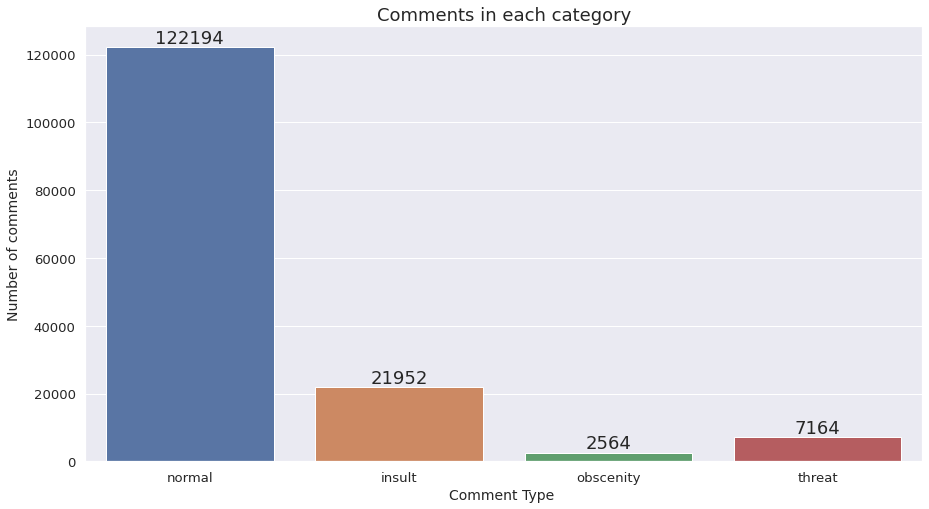

In [23]:
categories = list(train_df.columns[2:].values)
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
ax = sns.barplot(categories, train_df.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=18)
plt.ylabel('Number of comments', fontsize=14)
plt.xlabel('Comment Type ', fontsize=14)
#adding the text labels
rects = ax.patches
labels = train_df.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

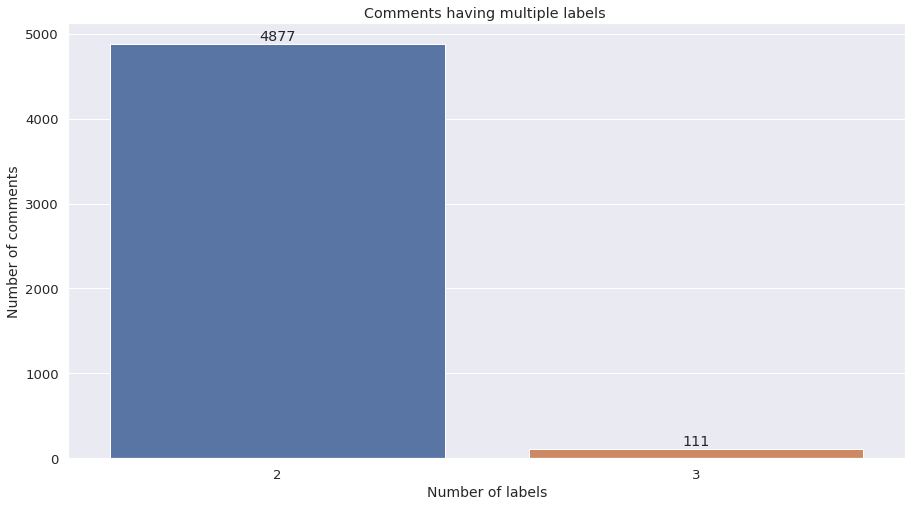

In [24]:
row_sums = train_df.iloc[:,2:].sum(axis=1)
multiLabel_counts = row_sums.value_counts().iloc[1:]
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=14)
plt.xlabel('Number of labels', fontsize=14)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [25]:
train_df.columns

Index(['id', 'comment', 'normal', 'insult', 'obscenity', 'threat'], dtype='object')

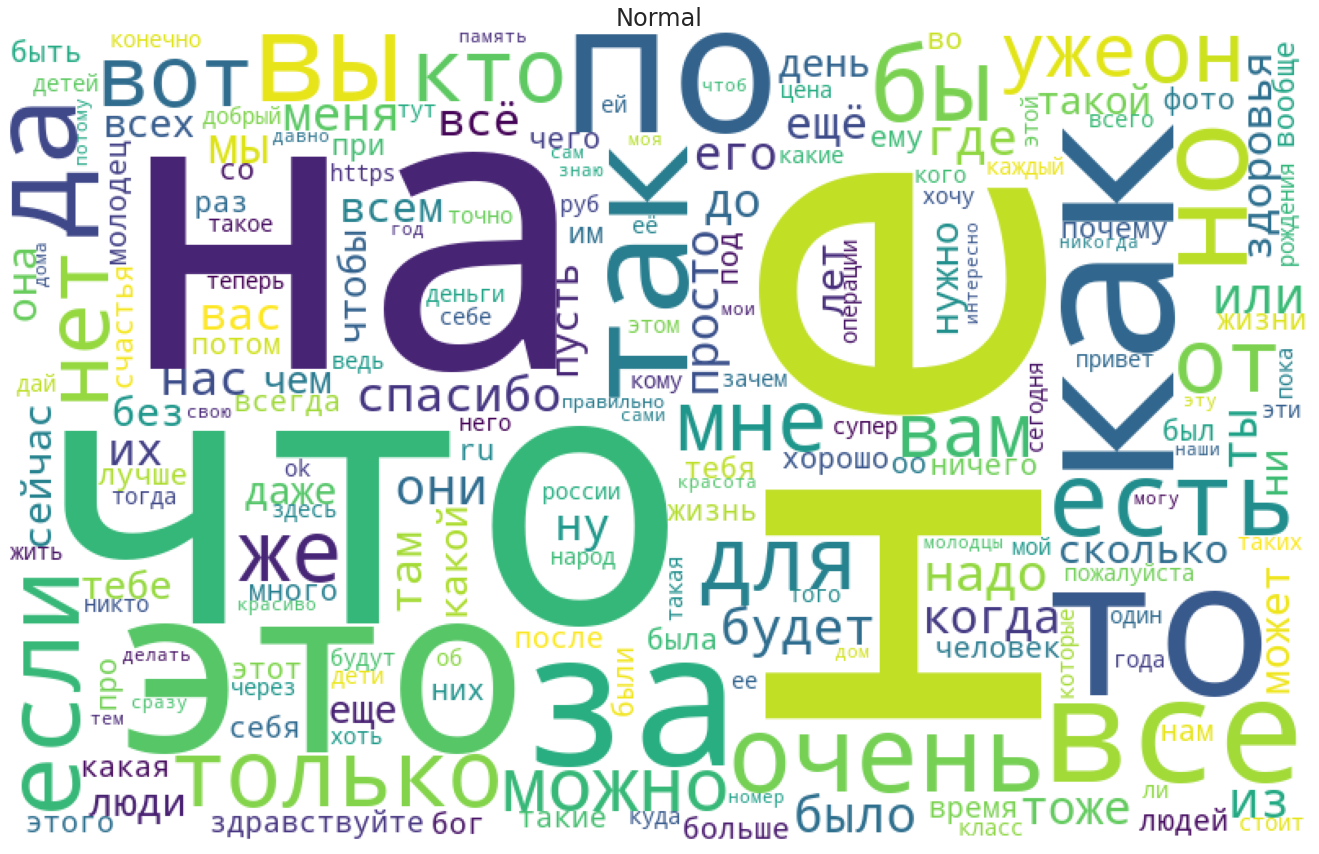

In [26]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(30,15))
# clean
subset = train_df[train_df['normal']==True]
text = subset['comment'].values
cloud_normal = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=800,
                          height=500
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Normal",fontsize=24)
plt.imshow(cloud_normal)

In [27]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [28]:
train_df.shape

(148775, 6)

In [29]:
filter = train_df['comment'] != ''
train_df = train_df[filter]
train_df = train_df.dropna()

In [30]:
train_df.shape

(148775, 6)

In [31]:
print(train_df['comment'][6789])

хорошо хоть, что копыта не откинула :d


In [32]:
print('Normal: ' + str(train_df['normal'][6789]))
print('Insult: ' + str(train_df['insult'][6789]))
print('Obscenity: ' + str(train_df['obscenity'][6789]))
print('Threat: ' + str(train_df['threat'][6789]))

Normal: 1
Insult: 0
Obscenity: 0
Threat: 0


In [33]:
comments_labels = train_df[['normal', 'insult', 'obscenity', 'threat']]
comments_labels.head()

,normal,insult,obscenity,threat
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,1,1,1


<AxesSubplot:>

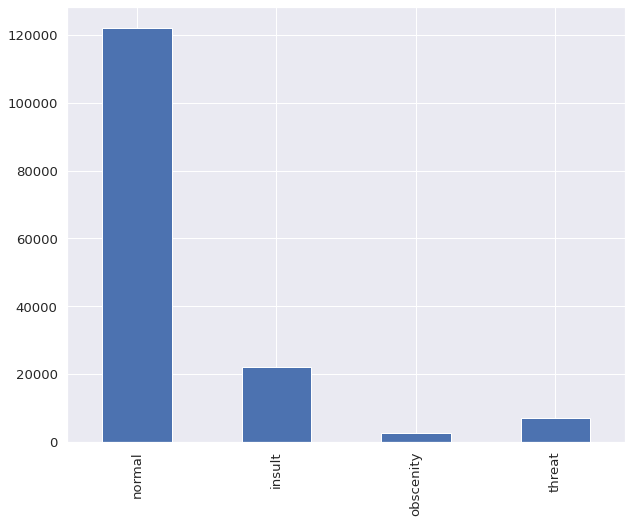

In [34]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

comments_labels.sum(axis=0).plot.bar()

In [35]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Zа-яА-Я]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Zа-яА-Я]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [36]:
X = []
sentences = list(train_df['comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

y = comments_labels.values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [41]:
len(X_train[0])

200

In [43]:
os.getcwd()

'/home/lexx/projects/compete/ok'

In [44]:
from navec import Navec

path = '/home/lexx/projects/compete/ok/navec_hudlit_v1_12B_500K_300d_100q.tar'

navec = Navec.load(path)

In [102]:
navec

In [99]:
#navec.vocab['a']

In [100]:
# navec['a']

In [101]:
# navec.vocab.pq[0]

In [75]:
vocab.counts

1745

In [105]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/home/lexx/projects/compete/ok/multilingual_embeddings.ru', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [114]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(4, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [115]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 300)          45373800  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 45,593,964
Trainable params: 220,164
Non-trainable params: 45,373,800
_________________________________________________________________
None


In [109]:
!pip3 install pydot

In [116]:
import pydot
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [113]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5


ValueError: in user code:

    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:748 train_step
        loss = self.compiled_loss(
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/lexx/.local/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 6) vs (None, 4))


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = train_df
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['comment'] = data['comment'].str.lower()
data['comment'] = data['comment'].apply(cleanHtml)
data['comment'] = data['comment'].apply(cleanPunc)
data['comment'] = data['comment'].apply(keepAlpha)

[nltk_data] Downloading package stopwords to /home/lexx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
train_df.head()

,id,comment,normal,insult,obscenity,threat
0,111211,,0,1,1,1
1,64749,,0,1,1,1
2,52574,,0,1,1,1
3,203832,,0,1,1,1
4,47394,,0,1,1,1


In [32]:
stop_words = set(stopwords.words('russian'))
# stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['comment'] = data['comment'].apply(removeStopWords)

In [34]:
data

,id,comment,normal,insult,obscenity,threat
0,111211,,0,1,1,1
1,64749,,0,1,1,1
2,52574,,0,1,1,1
3,203832,,0,1,1,1
4,47394,,0,1,1,1
...,...,...,...,...,...,...
148770,99767,,1,0,0,0
148771,87456,,1,0,0,0
148772,185614,,1,0,0,0
148773,86412,,0,1,0,0


In [ ]:
mu

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['comment_text'] = data['comment_text'].apply(stemming)

In [ ]:
temp = train_df.groupby('label').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
temp.style.background_gradient(cmap='Oranges')

In [ ]:
plt.figure(figsize=(12,6))\n",
    "sns.countplot(x='label',data=train_df)"

In [ ]:
fig = go.Figure(go.Funnelarea(\n",
    "    text = temp['label'],\n",
    "    values = temp['comment'],\n",
    "    title = {\"position\": \"top center\", \"text\": \"Funnel-Chart of Sentiment Distribution\"}\n",
    "    ))\n",
    "fig.show()

In [ ]:
from sklearn import preprocessing\n",
    "lb = preprocessing.LabelBinarizer()\n",
    "lb.fit(temp['label'])\n",
    "# LabelBinarizer()\n",
    "lb.classes_

In [ ]:
lb.transform(temp['label'])

In [ ]:
le = preprocessing.LabelEncoder()\n",
    "le.fit(temp['label'])\n",
    "le.classes_

In [ ]:
le_labels = le.transform(temp['label'])

In [ ]:
list(le.inverse_transform(le_labels))

In [ ]:
train_df['label_enc'] = le.transform(train_df['label'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
m = cv.fit_transform(train_df['comment'])

In [ ]:
m

In [ ]:
"#del train_df['comment']\n",
    "del train_df['label']"

In [ ]:
train_df['label_enc'].hist(bins=len(set(train_df['label_enc'])))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree\n",
    "from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier\n",
    "from sklearn.model_selection import train_test_split"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, list(train_df['label_enc']))

In [ ]:
dtc = DecisionTreeClassifier(max_depth=10)

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
dtc.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report

In [ ]:
preds = dtc.predict(X_test)

In [ ]:
print('Accuracy: ', float(accuracy_score(y_test, preds)*100), '%')\n",
    "print('Precision: ', precision_score(y_test, preds, average='macro'))\n",
    "print('Classification report: \\n', classification_report(y_test, preds))

In [ ]:
def calculate_metrics(self, submit):\n",
    "    df = self.answers.join(submit, on='id')\n",
    "\n",
    "    y_true = []\n",
    "    y_scores = []\n",
    "    for idx, row in df.iterrows():\n",
    "        answer_labels = row['labels'].split(',')\n",
    "        y_true.append([1 if label in answer_labels else 0 for label in LABELS])\n",
    "        y_scores.append([row['normal'], row['insult'], row['obscenity'], row['threat']])

In [ ]:
preds_r = rfc.predict(X_test)

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,20
plot_tree(dtc, filled=True)